Develop a model to predict customer churn for a subscription-
based service or business. Use historical customer data, including

features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient

Boosting to predict churn.

In [58]:
#step 1 >> Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [2]:
dataset = pd.read_csv(r"C:\Users\cheta\OneDrive\Pictures\Documents\anaconda_projects\Churn_Modelling.csv")

In [3]:
dataset.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [4]:
dataset.shape

(10000, 14)

First of all, we have to remove all unnecessary columns like CustomerId,Geography,Gender,Surname,RowNumber


In [6]:
dataset.drop(columns=["CustomerId","Surname","Geography","Gender","RowNumber"],inplace=True)

In [7]:
dataset.shape
dataset.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0


In [8]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset was clean, containing no missing values or null entries. Additionally, all features were already numerical, so no encoding for categorical variables was required.

In [9]:
dataset["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

The dataset is also balanced ,no need over/under sampling

In [10]:
x = dataset.iloc[:,:-1]
y = dataset["Exited"]

In [ ]:
Applied StandardScaler to bring all numerical features to the same scale.

In [11]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [12]:
x.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [13]:
from sklearn.tree import plot_tree

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state =42)

In [65]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [67]:
lr.score(x_test,y_test)*100

81.13333333333334

In [70]:
lr.score(x_train,y_train)*100

80.44285714285714

by using LogesticRegression our accuracy is 81%

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

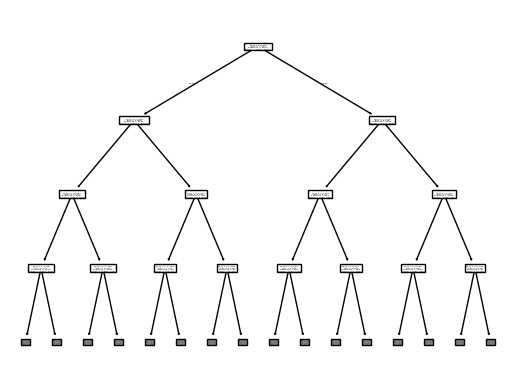

In [20]:
plot_tree(dt,max_depth=3)
plt.show()

In [21]:
dt.score(x_test,y_test)*100

77.8

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_depth=20, random_state=72)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, random_state=72)

In [74]:
model.score(x_train,y_train)*100

99.9

In [76]:
model.score(x_test,y_test)*100

85.86666666666667

By using RandomForestClassifier Accuracy of model is 85.8%

Model development is still in progress. Current performance decent,but improvements are ongoing.